In [3]:
import requests
import pandas as pd
import json
import psycopg2
from sqlalchemy import create_engine 
from dask.diagnostics import ProgressBar
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from nltk.stem import WordNetLemmatizer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import vstack, hstack, csr_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# OBJECTIVE

From the previous analysis we found that 

1. The dataset contains features that are not necessary to solve our **multi-classification problem**. 

2. For this **text classification problem**, we are going to build another dataframe that contains ‘Descriptor’ and ‘Compalint Type’



# PIPELINE

1. Text Classifiction problems can be modelled well with Linear SVC, Naive Bayers, Random Forests

2. Modelling the Prediction of Compalint based on Descriptor

In [4]:
df = dd.read_csv("C:\\EZOIC_ASSESSMENT\\Manhattan.csv",error_bad_lines=False)
df = df.compute()

In [5]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

def to_lower(x):
    return x.lower()


from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavani.nrusimhadevar\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df["Resolution Description"]= df["Resolution Description"].astype(str)
df["Descriptor"]= df["Descriptor"].astype(str) 

df['Descriptor'] = df['Descriptor'].apply(to_lower)
df["Descriptor"]= df["Descriptor"].astype(str) 
df['Descriptor'] = df['Descriptor'].apply(remove_stop_words)
df['Descriptor'] = df['Descriptor'].apply(remove_digits)
df['Descriptor'] = df['Descriptor'].apply(remove_punctuation)
df['Descriptor']= df['Descriptor'].apply(porter.stem)
df['Resolution Description'] = df['Resolution Description'].apply(to_lower)
df['Resolution Description'] = df['Resolution Description'].apply(remove_stop_words)
df['Resolution Description'] = df['Resolution Description'].apply(remove_digits)
df['Resolution Description'] = df['Resolution Description'].apply(remove_punctuation)
df['Resolution Description']= df['Resolution Description'].apply(porter.stem)

In [7]:
df['Location Type'] = df['Location Type'].astype(str) 
df['Location Type'] = df['Location Type'].apply(to_lower)
df['Location Type'] = df['Location Type'].apply(remove_punctuation)

In [8]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842670,2014-04-14 08:16:00,2014-04-24 11:15:00,DEP,Department of Environmental Protection,Water System,hydrant knocked overmissing wc,nan,10017,270 PARK AVENUE,...,Unspecified,MANHATTAN,40.755641,-73.975109,"(40.75564086047822, -73.97510913260558)",10.0,10.0,2014,4,0
1,27842682,2014-04-14 11:38:00,2014-04-15 03:45:00,DEP,Department of Environmental Protection,Water System,waterlow pressure wa,nan,10009,278 EAST 10 STREET,...,Unspecified,MANHATTAN,40.728225,-73.983158,"(40.72822500217204, -73.98315795150333)",0.0,0.0,2014,4,0
2,27842683,2014-04-14 15:13:00,2014-04-21 12:00:00,DEP,Department of Environmental Protection,Air Quality,air smoke vehicular aa,nan,10003,101 EAST 16 STREET,...,Unspecified,MANHATTAN,40.735867,-73.989153,"(40.73586711990034, -73.98915316963569)",6.0,6.0,2014,4,0
3,27842693,2014-04-14 00:00:00,2014-04-22 00:00:00,DOHMH,Department of Health and Mental Hygiene,Rodent,rat sight,3 family apt building,10162,500 EAST 77 STREET,...,Unspecified,MANHATTAN,40.769974,-73.951186,"(40.769974489179866, -73.95118592429507)",8.0,8.0,2014,4,0
4,27842714,2014-04-14 08:59:00,2014-04-14 12:00:00,DSNY,Manhattan 01,Sanitation Condition,street conddumpoutdropoff,street,10013,91 FRANKLIN STREET,...,Unspecified,MANHATTAN,40.718098,-74.004964,"(40.718097970057514, -74.0049638254782)",0.0,0.0,2014,4,0


In [9]:
df= df[df['Longitude'].notnull()]
df= df[df['Latitude'].notnull()]
df= df[df['Location'].notnull()]
df['Complaint Type'] = df['Complaint Type'].apply(remove_punctuation)
df['Complaint Type'] = df['Complaint Type'].apply(to_lower)
df[['Complaint Type','Descriptor','Resolution Description']].head()

,Complaint Type,Descriptor,Resolution Description
0,water system,hydrant knocked overmissing wc,department environmental protection investigat...
1,water system,waterlow pressure wa,department environment protection inspected co...
2,air quality,air smoke vehicular aa,department environmental protection observe vi...
3,rodent,rat sight,department health mental hygiene review compla...
4,sanitation condition,street conddumpoutdropoff,department sanitation investigated complaint f...


#### Target Variable Rephrasing

In [10]:
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("heat") ]["Complaint Type"].unique(),'HeatComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("noise") ]["Complaint Type"].unique(), 'NoiseComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("construction|plumbing") ]["Complaint Type"].unique(),'Construction/PlumbingComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("dof") ]["Complaint Type"].unique(),'DOFComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("parking|blocked driveway|park") ]["Complaint Type"].unique(),'ParkingComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("paint") ]["Complaint Type"].unique(),'Paint/PlasterComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("water") ]["Complaint Type"].unique(),'WaterComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("dirt|sanitation condition") ]["Complaint Type"].unique(),'SanitationComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("highway") ]["Complaint Type"].unique(),'HighwayComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(['street light condition', 'street condition',
       'street sign  damaged', 'sidewalk condition', 'dead tree',
       'street sign  dangling', 'street sign  missing', 'damaged tree',
       'new tree request', 'illegal tree damage',
       'rootsewersidewalk condition', 'overgrown treebranches',
       'request xmas tree collection', 'deaddying tree',
       'dep sidewalk condition','graffiti','derelict vehicles',
       'for hire vehicle complaint', 'derelict vehicle',
       'for hire vehicle report', 'abandoned vehicle',
       'city vehicle placard complaint'],'StreetComplaints')

df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("sewer|sewage") ]["Complaint Type"].unique(),'SewerComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(df[df['Complaint Type'].str.contains("homeless") ]["Complaint Type"].unique(),'HomelessComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(['traffic signal condition', 'traffic'],'TrafficComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(['taxi complaint', 'taxi report', 'taxi compliment',
       'green taxi report', 'dispatched taxi complaint'],'TaxiComplaints')
df['Complaint Type'] = df['Complaint Type'].replace(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'vacant apartment', 'building marshals office',
       'building condition','elevator'],'BuildingComplaints')
pd.set_option('display.max_rows', None)
df['Complaint Type'].value_counts()
df.loc[~df["Complaint Type"].isin(['NoiseComplaints',
'HeatComplaints',                           
'StreetComplaints',                         
'Construction/PlumbingComplaints',                    
'SanitationComplaints',                     
'WaterComplaints',                         
'BuildingComplaints',                       
'Paint/PlasterComplaints',                   
'TaxiComplaints',                           
'HomelessComplaints',
'DOFComplaints',
'HighwayComplaints',
'ParkingComplaints',
'broken muni meter',                        
'rodent',                                   
'consumer complaint',                      
'electric',                                  
'general',                                 
'SewerComplaints',                          
'request large bulky item collection',      
'air quality',                                
'nonconst',                                 
'TrafficComplaints',                         
'vending',                                   
'food establishment',                       
'missed collection all materials' ]), "Complaint Type"] = "Other Complaints"

In [11]:
df['Complaint Type'] = df['Complaint Type'].replace(['vending'],'StreetComplaints')
df['Complaint Type'].value_counts()

NoiseComplaints                        1051455
HeatComplaints                          415212
StreetComplaints                        355868
Other Complaints                        336644
Construction/PlumbingComplaints         242722
ParkingComplaints                       187106
WaterComplaints                         159555
BuildingComplaints                      120266
Paint/PlasterComplaints                 112715
TaxiComplaints                          107669
HomelessComplaints                       98431
broken muni meter                        91869
SanitationComplaints                     74869
rodent                                   57021
consumer complaint                       43008
electric                                 42232
general                                  41651
SewerComplaints                          33230
request large bulky item collection      32784
air quality                              31139
nonconst                                 28893
TrafficCompla

#### Location Type Rephrasing

In [12]:
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("residential") ]["Location Type"].unique(),'RESIDENTIAL')
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("school") ]["Location Type"].unique(),'SCHOOL')
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("apartment") ]["Location Type"].unique(),'APARTMENT')
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("comercial|commercial") ]["Location Type"].unique(),'COMMERCIAL')
df['Location Type'] = df['Location Type'].replace(['public gardenpark', 'park', 'parkplayground', 'public parkgarden'],'PARK')
df['Location Type'] = df['Location Type'].replace(df[df['Location Type'].str.contains("restaurant") ]["Location Type"].unique(),'RESTAURANT')


In [13]:
df['Location Type'].value_counts()

RESIDENTIAL                           1452869
nan                                    848731
streetsidewalk                         530606
street                                 342297
sidewalk                               178495
RESTAURANT                             106627
COMMERCIAL                             102602
3 family apt building                   31025
PARK                                    30024
mixed use                               17854
APARTMENT                               15061
other explain below                     12177
3 family mixed use building              7610
other                                    6633
above address                            4493
lot                                      4150
bus stop shelter                         4042
highway                                  3926
house of worship                         3873
SCHOOL                                   3714
12 family dwelling                       3046
street and sidewalk               

#### Status

In [14]:
df.loc[((df['Status']!='Closed') & (df['Year'] == 2012) 
       & (df['Resolution Description'].str.contains("investigated|submitted|reviewed|inspected"))) , "Status"] = "Closed"

In [15]:
df.loc[((df['Status']!='Closed' ) 
       & (df['Descriptor'].str.contains("derelict vehicl") ) 
       & (df['Resolution Description'].str.contains("removed"))) , "Status"] = "Closed"

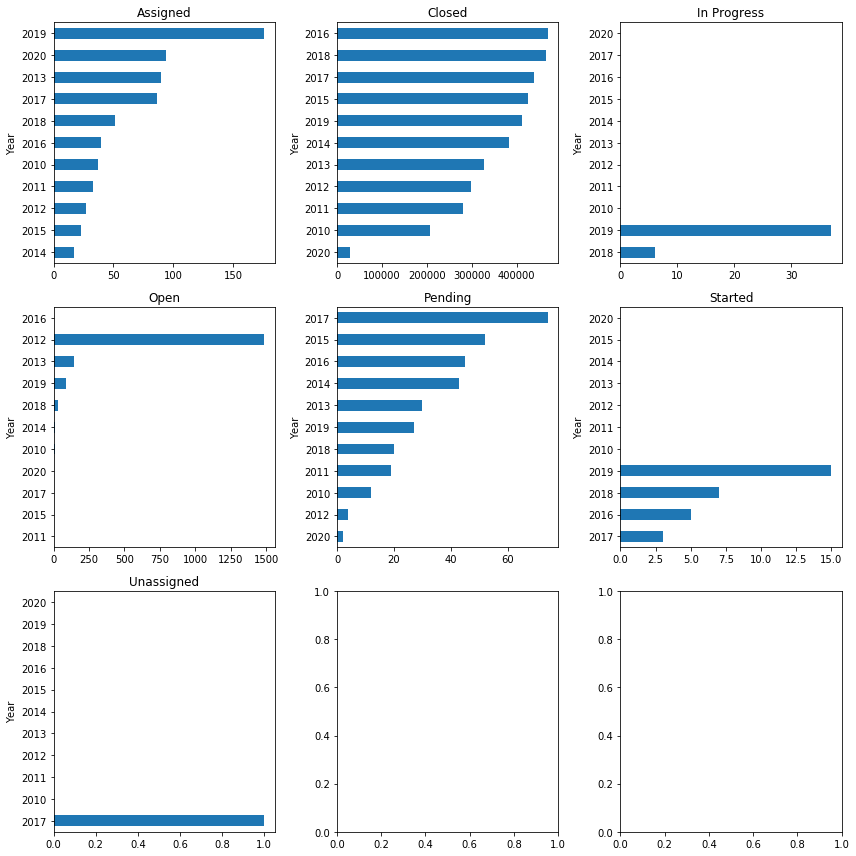

In [16]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [17]:
df = df[df['Location Type']!='nan']
df = df[df['Resolution Description']!='nan']

In [28]:
df.head(2).T

,3,4
Unique Key,27842693,27842714
Created Date,2014-04-14 00:00:00,2014-04-14 08:59:00
Closed Date,2014-04-22 00:00:00,2014-04-14 12:00:00
Agency,DOHMH,DSNY
Agency Name,Department of Health and Mental Hygiene,Manhattan 01
Complaint Type,rodent,SanitationComplaints
Descriptor,rat sight,street conddumpoutdropoff
Location Type,3 family apt building,street
Incident Zip,10162,10013
Incident Address,500 EAST 77 STREET,91 FRANKLIN STREET


In [29]:
df1 = df[['Agency','Location Type','Complaint Type','Descriptor','Resolution_Time','Total_Time','Year','Month','DayofWeek','Status','Resolution Description']]

In [30]:
df1.shape

(2851842, 11)

In [31]:
df_model = df1.head(60000)

In [32]:
#df_model = df1

In [33]:
df_model.head()

,Agency,Location Type,Complaint Type,Descriptor,Resolution_Time,Total_Time,Year,Month,DayofWeek,Status,Resolution Description
3,DOHMH,3 family apt building,rodent,rat sight,8.0,8.0,2014,4,0,Closed,department health mental hygiene review compla...
4,DSNY,street,SanitationComplaints,street conddumpoutdropoff,0.0,0.0,2014,4,0,Closed,department sanitation investigated complaint f...
5,DSNY,street,SanitationComplaints,street conddumpoutdropoff,0.0,0.0,2014,4,0,Closed,department sanitation investigated complaint f...
7,HPD,RESIDENTIAL,Other Complaints,mold,9.0,9.0,2014,4,0,Closed,department housing preservation development ab...
8,HPD,RESIDENTIAL,Other Complaints,refriger,17.0,17.0,2014,4,0,Closed,department housing preservation development ab...


### Create a new column 'complaint_id' with encoded Complaint Types

In [34]:
df_model['complaint_id'] = df_model['Complaint Type'].factorize()[0]
complaint_id_df = df_model[['Complaint Type', 'complaint_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(complaint_id_df.values)
id_to_category = dict(complaint_id_df[['complaint_id', 'Complaint Type']].values)

# New dataframe
df_model.head()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Agency,Location Type,Complaint Type,Descriptor,Resolution_Time,Total_Time,Year,Month,DayofWeek,Status,Resolution Description,complaint_id
3,DOHMH,3 family apt building,rodent,rat sight,8.0,8.0,2014,4,0,Closed,department health mental hygiene review compla...,0
4,DSNY,street,SanitationComplaints,street conddumpoutdropoff,0.0,0.0,2014,4,0,Closed,department sanitation investigated complaint f...,1
5,DSNY,street,SanitationComplaints,street conddumpoutdropoff,0.0,0.0,2014,4,0,Closed,department sanitation investigated complaint f...,1
7,HPD,RESIDENTIAL,Other Complaints,mold,9.0,9.0,2014,4,0,Closed,department housing preservation development ab...,2
8,HPD,RESIDENTIAL,Other Complaints,refriger,17.0,17.0,2014,4,0,Closed,department housing preservation development ab...,2


### Text Preprocessing

In [35]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

In [36]:
df_model.head()

,Agency,Location Type,Complaint Type,Descriptor,Resolution_Time,Total_Time,Year,Month,DayofWeek,Status,Resolution Description,complaint_id
3,DOHMH,3 family apt building,rodent,rat sight,8.0,8.0,2014,4,0,Closed,department health mental hygiene review compla...,0
4,DSNY,street,SanitationComplaints,street conddumpoutdropoff,0.0,0.0,2014,4,0,Closed,department sanitation investigated complaint f...,1
5,DSNY,street,SanitationComplaints,street conddumpoutdropoff,0.0,0.0,2014,4,0,Closed,department sanitation investigated complaint f...,1
7,HPD,RESIDENTIAL,Other Complaints,mold,9.0,9.0,2014,4,0,Closed,department housing preservation development ab...,2
8,HPD,RESIDENTIAL,Other Complaints,refriger,17.0,17.0,2014,4,0,Closed,department housing preservation development ab...,2


**TF/IDF**

1. TERM FREQUENCY (TF)  = Number of times term appears in doc / Total number of words in doc

2. IDF = ln(no of docs / no of docs term appears in)

3. TF-IDF gives **word frequency** scores

4. ngrams(1,2) --> gives UNIGRAMS AND BIGRAMS

5. min_df: **remove the words** from the vocabulary which have occurred in less than ‘min_df’ number of files

As we knew descriptor is one of the important feature

### TFIDF on "Descriptor"

In [37]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df_model['Descriptor']).toarray()

labels = df_model.complaint_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 60000 complaints is represented by 375 features (TF-IDF score of unigrams and bigrams)


#### Trying to Find most correlated terms of descriptor for each complaint type

In [38]:
 #Finding the three most correlated terms with each of the complaint categories
N = 3
for Product, complaint_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == complaint_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("\n==> %s:" %(Product))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> BuildingComplaints:
  * Most Correlated Unigrams are: fram, door, floor
  * Most Correlated Bigrams are: window pan, door fram, window fram

==> Construction/PlumbingComplaints:
  * Most Correlated Unigrams are: suppli, bathtubshow, basinsink
  * Most Correlated Bigrams are: entire build, steam piperis, water suppli

==> HeatComplaints:
  * Most Correlated Unigrams are: apart, build, entire
  * Most Correlated Bigrams are: heavy flow, rat sight, entire build

==> HighwayComplaints:
  * Most Correlated Unigrams are: defect, highway, pothole
  * Most Correlated Bigrams are: entire build, dead anim, pothole highway

==> HomelessComplaints:
  * Most Correlated Unigrams are: wall, pest, nan
  * Most Correlated Bigrams are: heavy flow, rat sight, entire build

==> NoiseComplaints:
  * Most Correlated Unigrams are: talk, musicparti, loud
  * Most Correlated Bigrams are: truck nois, loud talk, loud musicparti

==> Other Complaints:
  * Most Correlated Unigrams are: garbagerecycling, mold,

############################################################################################

1. Multinominal Niave Bayes is most suitable for **word counts** where data are typically represented as word vector counts and  ignores non-occurrences of a feature i

2. Naive Bayes is a simplified version of Bayes Theorem, where all features are assumed **conditioned independent** to each other (the classifiers), P(x|y) where x is the feature and y is the classifier

#############################################################################################

1. Linear SVC works well on text classification is a part of SVM best for multi class text classification

2. For larger datasts SVM is not a better option as compared to naive bayes it takes more time 

3. If classes are over lapping( not in the case of our exampels) it doesnt work well

 

In [39]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [40]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.996600,0.000708
MultinomialNB,0.995117,0.000994
RandomForestClassifier,0.760333,0.008013


#### Model Evaluation

In [41]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df_model.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
# Classification report
from sklearn import metrics
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df_model['Complaint Type'].unique()))

				CLASSIFICATIION METRICS

                                 precision    recall  f1-score   support

                         rodent       1.00      1.00      1.00       973
           SanitationComplaints       1.00      1.00      1.00      1086
               Other Complaints       1.00      1.00      1.00      2956
Construction/PlumbingComplaints       0.99      1.00      0.99      1225
                       electric       1.00      1.00      1.00       578
             BuildingComplaints       1.00      1.00      1.00      1690
                        general       0.99      1.00      1.00       699
                 HeatComplaints       1.00      1.00      1.00      2064
        Paint/PlasterComplaints       1.00      0.99      0.99      1879
                NoiseComplaints       1.00      0.97      0.98        58
               StreetComplaints       1.00      0.97      0.98       516
                WaterComplaints       1.00      1.00      1.00       931
              broken 

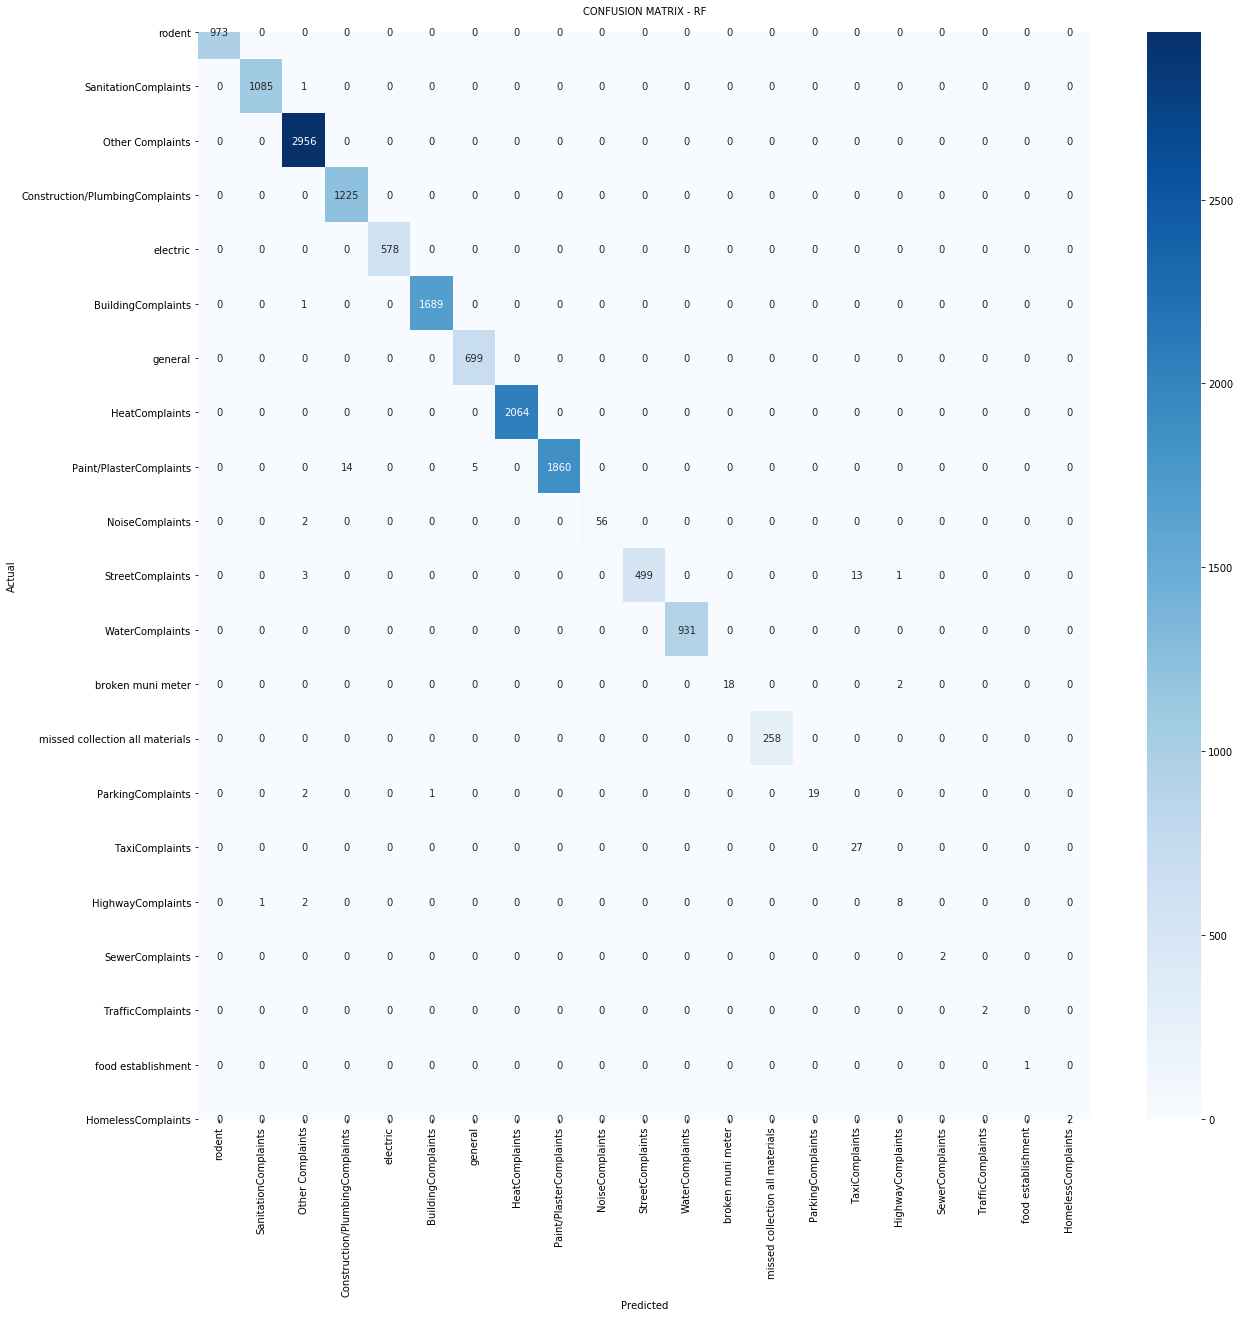

In [43]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=complaint_id_df['Complaint Type'].values, 
            yticklabels=complaint_id_df['Complaint Type'].values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - RF\n", size=10);

### Seeing what complaints are classified different

In [44]:
for predicted in complaint_id_df.complaint_id:
    for actual in complaint_id_df.complaint_id:
        if predicted != actual and conf_mat[actual, predicted] >= 20:
            print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], 
                                                           id_to_category[predicted], 
                                                           conf_mat[actual, predicted]))
            display(df_model.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Complaint Type','Descriptor','Resolution Description']])
            print('')

#### Most correlated terms in each compalint

In [45]:
model.fit(features, labels)

N = 4
for Product, complaint_id in sorted(category_to_id.items()):
    indices = np.argsort(model.coef_[complaint_id])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
    print("\n==> '{}':".format(Product))
    print("  * Top unigrams: %s" %(', '.join(unigrams)))
    print("  * Top bigrams: %s" %(', '.join(bigrams)))


==> 'BuildingComplaints':
  * Top unigrams: floor, door, stair, roof
  * Top bigrams: window pan, door dumbwait, window fram, roof doorhatch

==> 'Construction/PlumbingComplaints':
  * Top unigrams: basinsink, bathtubshow, toilet, boiler
  * Top bigrams: water suppli, steam piperis, driver complaint, basket request

==> 'HeatComplaints':
  * Top unigrams: apart, entire, build, leaninguproot
  * Top bigrams: entire build, basket request, branch limb, tree leaninguproot

==> 'HighwayComplaints':
  * Top unigrams: pl, pothole, highway, litter
  * Top bigrams: pothole highway, dead anim, ea dirty, dirty areaalleyway

==> 'HomelessComplaints':
  * Top unigrams: nan, posted, mgmt, bldg
  * Top bigrams: basket request, driver complaint, ea litter, basket improper

==> 'NoiseComplaints':
  * Top unigrams: bangingpound, cartruck, loud, talk
  * Top bigrams: loud talk, loud musicparti, truck nois, collection truck

==> 'Other Complaints':
  * Top unigrams: pigeon, animal, detector, pest
  * Top

### Predictions

In [46]:
X = df_model['Descriptor']
y = df_model['Complaint Type']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

##### I am predicting my model for new descriptors

In [54]:
new_descriptor1 = """parking is not good"""
print(model.predict(fitted_vectorizer.transform([new_descriptor1])))

['ParkingComplaints']


In [51]:
new_descriptor2 = """trash"""
print(model.predict(fitted_vectorizer.transform([new_descriptor2])))

['Other Complaints']


In [52]:
new_descriptor3 = """trees"""
print(model.predict(fitted_vectorizer.transform([new_descriptor3])))

['Other Complaints']


##### TF IDF Vectorization

cv = CountVectorizer(min_df=10)
X_agency = cv.fit_transform(df_model['Agency'])
print(X_agency)

##### Apply TFIDF to "resolution description", 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(df_model['Resolution Description'])

tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_descriptor = tv.fit_transform(df_model['Descriptor'])

lb = LabelBinarizer(sparse_output=True)
X_status = lb.fit_transform(df_model['Status'])

lb = LabelBinarizer(sparse_output=True)
X_comtype = lb.fit_transform(df_model['Complaint Type'])

lb = LabelBinarizer(sparse_output=True)
X_loctype = lb.fit_transform(df_model['Location Type'])

##### Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(df_model[['Total_Time', 'Resolution_Time','Year','Month','DayofWeek']], sparse=True).values)

###### Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_descriptor, X_status, X_loctype)).tocsr()

print("nrows",sparse_merge.shape[0])